In [1]:
%matplotlib inline
import time
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from sklearn import preprocessing
from sklearn import metrics
plt.rcParams['figure.figsize'] = (15, 6)

# Summarize Data
## Load the data

In [2]:
# Link to data on the disk
#data_path = '/home/salm/Documents/spamData/spambase.data' # Ubuntu
data_path = '/Users/salemameen/Documents/spambase/spambase.data' # MAC
# data_path = 'PATH TO THE DATA'
names = ['f1', 'f2', 'f3', 'f4','f5','f6','f7','f8','f9','f10','f11',
         'f12','f13','f14','f15','f16','f17','f18','f19','f20',
         'f21','f22','f23','f24','f25','f26','f27','f28' , 'f29','f30','f31','f32',
         'f33','f34','f35','f36','f37','f38','f39' ,'f40','f41','f42','f43','f44','f45',
         'f46','f47','48','f49','f50','f51','f52','f53','f54','f55', 'f56','f57','class']
data = pd.read_csv(data_path, names=names)
if(len(data)>0):
    print 'The dataset has been loaded'

The dataset has been loaded


## Describe Data

In [3]:
print(data)

        f1    f2    f3   f4    f5    f6    f7    f8    f9   f10  ...      f49  \
0     0.00  0.64  0.64  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...    0.000   
1     0.21  0.28  0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...    0.000   
2     0.06  0.00  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...    0.010   
3     0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...    0.000   
4     0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...    0.000   
5     0.00  0.00  0.00  0.0  1.85  0.00  0.00  1.85  0.00  0.00  ...    0.000   
6     0.00  0.00  0.00  0.0  1.92  0.00  0.00  0.00  0.00  0.64  ...    0.000   
7     0.00  0.00  0.00  0.0  1.88  0.00  0.00  1.88  0.00  0.00  ...    0.000   
8     0.15  0.00  0.46  0.0  0.61  0.00  0.30  0.00  0.92  0.76  ...    0.000   
9     0.06  0.12  0.77  0.0  0.19  0.32  0.38  0.00  0.06  0.00  ...    0.040   
10    0.00  0.00  0.00  0.0  0.00  0.00  0.96  0.00  0.00  1.92  ...    0.000   
11    0.00  0.00  0.25  0.0 

In [4]:
print(data.describe())

                f1           f2           f3           f4           f5  \
count  4601.000000  4601.000000  4601.000000  4601.000000  4601.000000   
mean      0.104553     0.213015     0.280656     0.065425     0.312223   
std       0.305358     1.290575     0.504143     1.395151     0.672513   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.420000     0.000000     0.380000   
max       4.540000    14.280000     5.100000    42.810000    10.000000   

                f6           f7           f8           f9          f10  \
count  4601.000000  4601.000000  4601.000000  4601.000000  4601.000000   
mean      0.095901     0.114208     0.105295     0.090067     0.239413   
std       0.273824     0.391441     0.401071     0.278616     0.644755   
min       0.000000     0.000000     0

# Visualize Data
## Feature Distributions


/Users/salemameen/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2885: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/salemameen/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  from ipykernel import kernelapp as app


{'boxes': [<matplotlib.lines.Line2D at 0x110fe7d50>,
 'caps': [<matplotlib.lines.Line2D at 0x111f86950>,
 'fliers': [<matplotlib.lines.Line2D at 0x11204ec50>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11204e610>,
 'whiskers': [<matplotlib.lines.Line2D at 0x111f6dc10>,
  <matplotlib.lines.Line2D at 0x1149d2190>]}

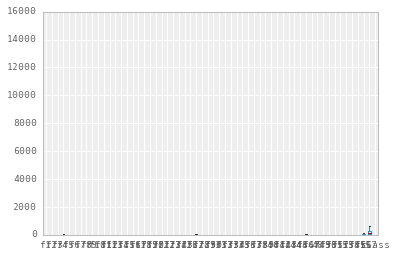

In [5]:
pd.options.display.mpl_style = 'default'
data.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115389510>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x117f4d050>]], dtype=object)

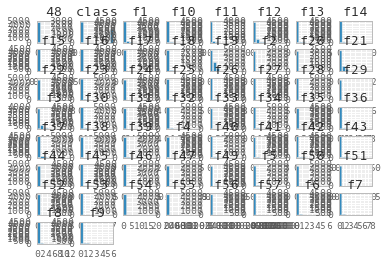

In [6]:
data.hist()

class
0    [[Axes(0.125,0.823267;0.0767327x0.0767327), Ax...
1    [[Axes(0.125,0.823267;0.0767327x0.0767327), Ax...
dtype: object

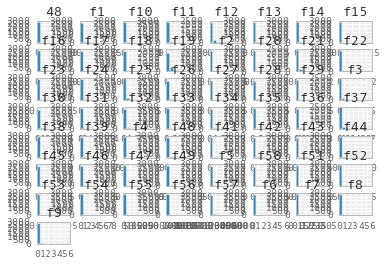

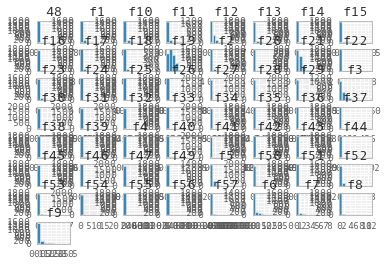

In [7]:
data.groupby('class').hist()

class
0    Axes(0.125,0.125;0.775x0.775)
1    Axes(0.125,0.125;0.775x0.775)
Name: f1, dtype: object

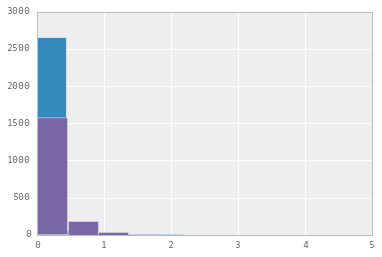

In [10]:
data.groupby('class').f1.hist(alpha=0.4)

class
0    Axes(0.125,0.125;0.775x0.775)
1    Axes(0.125,0.125;0.775x0.775)
Name: f2, dtype: object

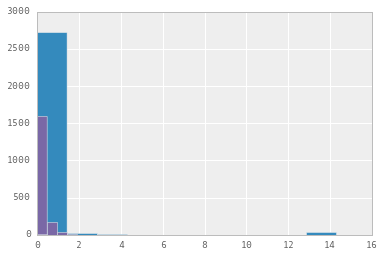

In [15]:
data.groupby('class').f2.hist()

class
0    Axes(0.125,0.125;0.775x0.775)
1    Axes(0.125,0.125;0.775x0.775)
Name: f3, dtype: object

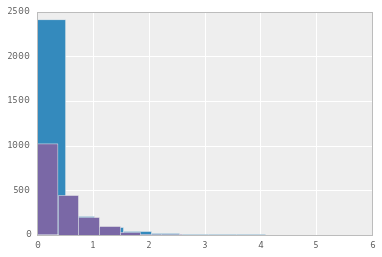

In [14]:
data.groupby('class').f3.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12bc4f550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12bde9a10>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12ec1a110>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x130f314d0>, ...,
       ..., 
        <matplotlib.axes._subplots.AxesSubplot object at 0x1d7a64e50>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1da998c10>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1dcda4050>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1e0ba5390>]], dtype=object)

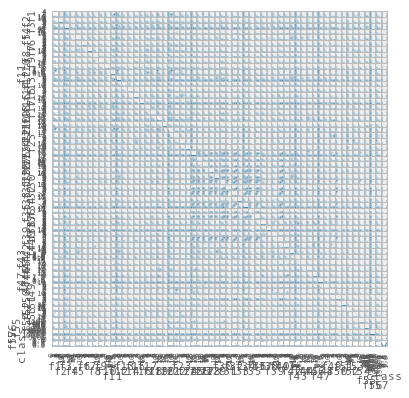

In [16]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data, alpha=0.2, figsize=(6, 6), diagonal='kde')